In [2]:
using StatGeochem
using DelimitedFiles
using JLD

using Plots; gr();
using StatsPlots

include("../src/config.jl")

284.20000000000005

In [3]:
## Translate Abers and Hacker mineral codes to Perplex solutions and endmembers. 
## Use solution when possible because that's what Perplex reports (at least directly)
## For old solution list 

phase_to_solution_model = Dict([("qz", "q"), ("coe", "coe"), ("hAb", "feldspar"), 
        ("lAb", "feldspar"), ("an", "feldspar"), 
        ("or", "feldspar"), ("san", "feldspar"), ("alm", "Gt(HP)"), 
        ("gr", "Gt(HP)"), ("py", "Gt(HP)"), 
        ("fo", "O(HP)"), ("fa", "O(HP)"), ("en", "Opx(HP)"), 
        ("fs", "Opx(HP)"), ("mgts", "Opx(HP)"), 
        ("di", "Omph(GHP)"), ("hed", "Omph(GHP)"), ("jd", "Omph(GHP)"),
        ("ac", "Omph(GHP)"), ("cats", "Omph(GHP)"), 
        ("gl", "GlTrTsPg"), ("fgl", "GlTrTsPg"), ("tr", "GlTrTsPg"), 
        ("fact", "GlTrTsPg"), ("ts", "GlTrTsPg"), 
        ("parg", "GlTrTsPg"), ("hb", "GlTrTsPg"), 
        ("anth", "GlTrTsPg"), ("phl", "Bio(TCC)"), ("ann", "Bio(TCC)"), 
        ("mu", "Mica(CF)"), ("cel", "Mica(CF)"), ("ta", "T"), 
        ("clin", "Chl(HP)"), ("daph", "Chl(HP)"), 
        ("atg", "atg"), ("zo", "zo"), ("cz", "cz"), ("ep", "ep"), ("law", "law"), 
        ("pre", "pre"), ("pump", "pump"), ("lmt", "lmt"), ("wrk", "wrk"), ("br", "br"), 
        ("chum", "chum"), ("phA", "phA"), ("sill", "sill"), ("ky", "ky"), ("sp", "Sp(HP)"), 
        ("herc", "Sp(HP)"), ("mt", "Sp(HP)"), ("ilm", "ilm"), ("rut", "rut"), ("ttn", "ttn"), 
        ("crd", "crd"), ("scap", "scap"), ("cc", "Do(HP)"), ("arag", "arag"), ("mag", "mag")]);

In [4]:
sm_to_name = Dict([("O(HP)","olivine"),
        ("mont", "monticellite"),
        ("bq", "bq??"),
        ("fctd", "Fe-chloritoid"),
        ("fper", "fper??"),
        ("cen", "cen??"),
        ("H2O", "CO2-H2O fluid"),
        ("stlp", "stlp??"),
        ("ru", "rutile"),
        ("cor", "corundum"),
        ("gl_dqf", "gl_dqf??"),
        ("fanth", "Fe-anthophyllite"),
        ("ilm_nol", "ilmenite"),
("Opx(HP)","orthopyroxene"),
("Omph(GHP)","clinopyroxene"),
("Gt(HP)","garnet"),
("oAmph(DP)","orthoamphibole"),
("GlTrTsPg","clinoamphibole"),
("T","talc") ,
("B","brucite"), 
("Anth","anthophyllite"),
("Chl(HP)","chlorite"),
("Bio(TCC)","biotite"),
("Mica(CF)","mica"),
("Ctd(HP)","chloritoid"),
("IlHm(A)","ilmenite"),
("Sp(HP)","spinel"),
("Sapp(HP)","sapphirine"),
("St(HP)","staurolite"),
("feldspar","feldspar"),
("Do(HP)","dolomite"), 
("Augite(G)","clinopyroxene"), 
("Opx(JH)","orthoproxene"), 
("cAmph(G)","clinoamphibole"), 
("oAmph(DP)","orthoamphibole"), 
("feldspar_B","ternary feldspar"), 
("O(JH)","olivine"), 
("Sp(JH)","spinel"), 
("Grt(JH)","garnet"), 
("Mica(W)","white mica"), 
("Bio(TCC)","biotite mica"), 
("Chl(W)","chlorite"), 
("Ctd(W)","chloritoid"), 
("Crd(W)","cordierite"), 
("Sa(WP)","sapphirine"), 
("St(W)","staurolite"), 
("Ilm(WPH)","ilmenite"), 
("Atg(PN)","antigorite"), 
("T","talc"), 
("B","brucite"), 
("F","CO2-H2O fluid"), 
("Do(HP)","dolomite"), 
("Scap","scapolite"), 
("Chum","clinohumite"), 
("Neph(FB)","nepheline"),
("fpm", "fpm ???" ),
("cz", "clinozoisite"),
 ("ab"  , "albite"),
 ("q"   , "quartz"),
 ("fstp", "fstp ???"),
 ("cc"  , "calcite"),
 ("sph" , "sphene"),
 ("law" , "lawsonite"),
 ("ky"  , "kyanite"),
 ("zo"  , "zoisite"),
 ("ep"  , "epidote"),
 ("pre" , "prehnite"), 
 ("pump", "pumpellyite"),
 ("lmt", "laumontite"), 
        ("rut", "rutile"),
        ("stlb", "stilbite"),
        ("mic", "microcline"),
        ("ilm", "ilmenite"),
        ("acti","acti ???" )]);

In [121]:
end_to_name_general = Dict([("omph", "omphacite"), ("opx", "orthopyroxene"), ("cpx", "clinopyroxene"),
        ("gt", "garnet"), 
        ("amph", "amphibole"), ("trem", "tremolite"), ("ol", "olivine"), 
            ("ep", "epidote"), ("bt", "biotite"), 
            ("ms" ,"muscovite"), ("chl", "chlorite"), ("plg", "plagioclase"), 
            ("fsp" , "K-feldspar"), ("qu", "quartz"), ("carb", "carbonate"), 
            ("apat", "apatite"), ("opaq", "opaques"), ("sph", "sphene"), ("serp", "serpentine"),
        ("pa","paragonite"),
("mic","microcline"),
("fcel","Fe-celadonite"),
("alm","garnet"),
("tr","tremolite"),
("ftr","amphibole"),
("mu","muscovite"),
("ts","hornblende"),
("cz","epidote"),
("cel","biotite"),
("dol","carbonate"),
("gr","garnet"),
("py","garnet"),
("gl","amphibole"),
("ank","carbonate"),
("ab","K-feldspar"),
("q","quartz"),
("parg","amphibole"),
("phl","biotite"),
("daph","chlorite"),
("clin","chlorite"),
("ames","amesite"),
("afchl","chlorite"),
("ru","rutile"),
("ilm","ilmenite"),
("geik","ilmenite"),
("hed","clinopyroxene"),
("di","clinopyroxene"),
("fgl","amphibole"),
("jd","clinopyroxene"),
("ky","kyanite"),
("anth","amphibole"),
("fanth","amphibole"),
("cc","calcite"),
("sp","spinel"),
("fo","olivine"),
("herc","spinel"),
("naph","biotite"),
("mag","magnesite"),
("fa","olivine"),
("fstp","fstp"),
("law","lawsonite"),
("H2O","h2o"),
("en","orthopyroxene"),
("sid","carbonate"),
("mgts","clinopyroxene"),
("fs","orthopyroxene")]);

In [91]:
end_to_name_specific = Dict([("omph", "omphacite"), ("opx", "orthopyroxene"), ("cpx", "clinopyroxene"), ("gt", "garnet"), 
        ("amph", "amphibole"), ("trem", "tremolite"), ("ol", "olivine"), 
            ("ep", "epidote"), ("bt", "biotite"), 
            ("ms" ,"muscovite"), ("chl", "chlorite"), ("plg", "plagioclase"), 
            ("fsp" , "K-feldspar"), ("qu", "quartz"), ("carb", "carbonate"), 
            ("apat", "apatite"), ("opaq", "opaques"), ("sph", "sphene"), ("serp", "serpentine"),
        ("pa","paragonite"),
("mic","microcline"),
("fcel","Fe-celadonite"),
("alm","almandine"),
("tr","tremolite"),
("ftr","ferroactinolite"),
("mu","muscovite"),
("ts","tschermakite"),
("cz","clinozoisite"),
("cel","celadonite"),
("dol","dolomite"),
("gr","grossular"),
("py","pyrope"),
("gl","glaucophane"),
("ank","ankerite"),
("ab","albite"),
("q","quartz"),
("parg","pargasite"),
("phl","phlogopite"),
("daph","daphnite"),
("clin","clinochlore"),
("ames","amesite"),
("afchl","chlorite"),
("ru","rutile"),
("ilm","ilmenite"),
("geik","geikielite"),
("hed","hedenbergite"),
("di","diopside"),
("fgl","glaucophane"),
("jd","jadeite"),
("ky","kyanite"),
("anth","anthophyllite"),
("fanth","anthophyllite"),
("cc","calcite"),
("sp","spinel"),
("fo","forsterite"),
("herc","hercynite"),
("naph","phlogopite"),
("mag","magnesite"),
("fa","fayalite"),
("fstp","fstp"),
("law","lawsonite"),
("H2O","h2o"),
("en","enstatite"),
("sid","siderite"),
("mgts","tschermak"),
("fs","ferrosilite")]);

## Old solution models 

* O(HP)             olivine
* Opx(HP)           orthopyroxene
* Omph(GHP)         clinopyroxene
* Gt(HP)            garnet
* oAmph(DP)         orthoamphibole
* GlTrTsPg          clinoamphibole   --- I think the endmembers of this are redundant with the above 
* T                 talc 
* B                 brucite 
* Anth              anthophyllite
* Chl(HP)           chlorite
* Bio(TCC)          biotite
* Mica(CF)
* Ctd(HP)           chloritoid
* IlHm(A)           ilmenite
* Sp(HP)            spinel
* Sapp(HP)          sapphirine
* St(HP)            staurolite
* feldspar
* Do(HP)            dolomite

## Brenhin's proposed new solution models 

* Augite(G)		clinopyroxene
* Opx(JH)			orthoproxene
* cAmph(G)		clinoamphibole
* oAmph(DP)		orthoamphibole
* feldspar_B		ternary feldspar
* O(JH)		olivine
* Sp(JH)		spinel
* Grt(JH)		garnet
* Mica(W)		white mica
* Bio(TCC)		biotite mica
* Chl(W)		chlorite
* Ctd(W)		chloritoid
* Crd(W)		cordierite
* Sa(WP)		sapphirine
* St(W)		staurolite
* Ilm(WPH)	ilmenite
* Atg(PN)		antigorite
* T		talc
* B		brucite
* F		CO2-H2O fluid
* Do(HP)		dolomite/calcite
* Scap		scapolite
* Chum		clinohumite
* Neph(FB)		nepheline

In [5]:
kd_min_modes, header = readdlm("../data/kern_dabie_minmode.csv", ',', header=true);

In [7]:
file = jldopen("/users/gailin/dartmouth/crustal_structure/runPerplexBatchVp/data/perplexEndmembers.jld","r")
perplex_modes = read(file, "dat");

In [94]:
kd_to_plot = kd_min_modes[:,4:end]
kd_to_plot[kd_to_plot.== ""] .= 0;
kd_to_plot[kd_to_plot.== "<0.1"] .= 0;
kd_to_plot = convert(Array{Float64,2}, kd_to_plot);
kd_endmembers = [end_to_name[e] for e in header[4:end]];

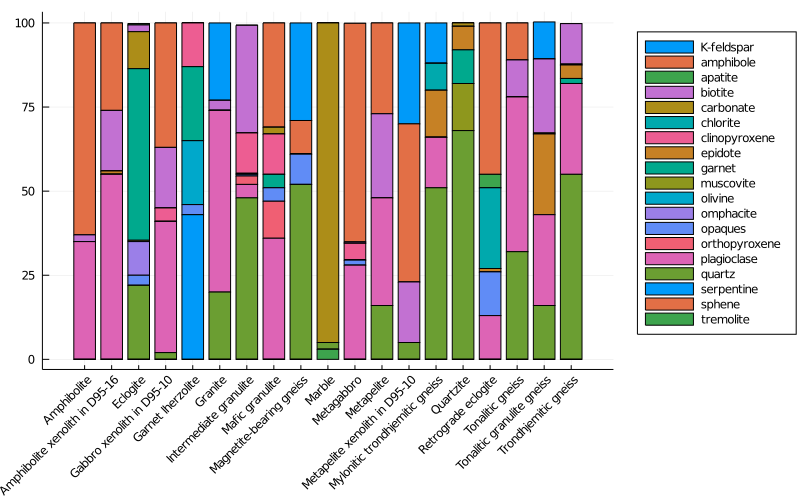

In [95]:
ctg = repeat(kd_endmembers, inner = size(kd_to_plot)[1])
#print(unique_modes[elts_idx])
rocks = kd_min_modes[:,2][:]
nam = repeat(rocks, outer = size(kd_to_plot)[2])

groupedbar(nam, kd_to_plot, bar_position=:stack, group=ctg, legend = :outerright, 
    size = (800, 500), xrotation = 45)


In [122]:
perplex_endmembers = []
for row in keys(perplex_modes)
    for k in keys(perplex_modes[row])
        if !(k in perplex_endmembers)
            append!(perplex_endmembers, [k])
        end
    end
end

perplex_endmembers_names = [end_to_name_general[e] for e in perplex_endmembers];

In [126]:
unique_names= unique(perplex_endmembers_names)
pp_plot = zeros((30, length(unique_names)))
for i in keys(perplex_modes)
    for (j, name) in enumerate(perplex_endmembers)
        jnew = findfirst(isequal(perplex_endmembers_names[j]), unique_names)
        pp_plot[i,jnew] += get(perplex_modes[i], name, 0.0)
    end
end

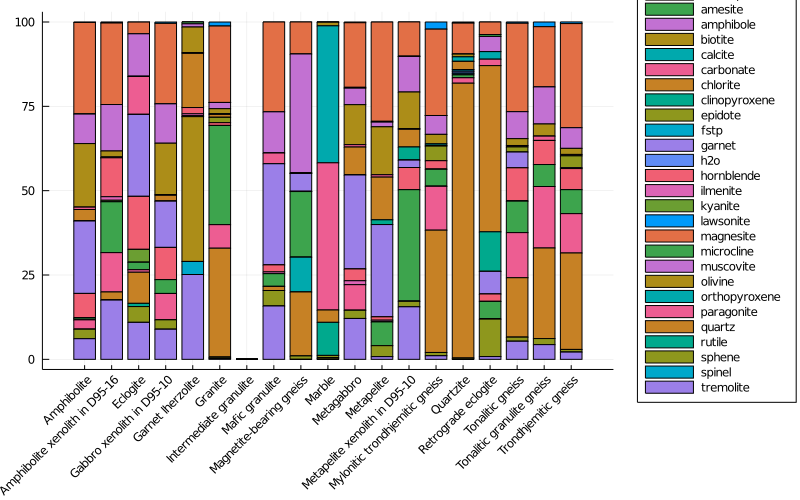

In [127]:
#pp_plot = pp_plot[1:3,:]

ctg = repeat(unique_names, inner = size(pp_plot)[1])
#print(unique_modes[elts_idx])
rocks = kd_min_modes[:,2][:]#[1:3]
nam = repeat(rocks, outer = size(pp_plot)[2])

groupedbar(nam, pp_plot, bar_position=:stack, group=ctg, legend = :outerright, 
    size = (800, 500), xrotation = 45)

## Below: old

In [7]:
# Compile unique modes over all three data sets (Perplex new sm, perplex old sm, a&h)
# Convert all to names

# set of all minerals in a&h
ah_mins_numeric = ah_min_modes[:, 5:end]
ah_mins_numeric[ah_mins_numeric .== ""] .= 0 
present_minerals = (sum(ah_mins_numeric, dims=2) .!= 0)[:]
ah_mins_numeric = ah_mins_numeric[present_minerals, :]

ah_mins = [sm_to_name[phase_to_solution_model[k]] for k in ah_min_modes[:,1][present_minerals]]
ah_mins_unique = unique(ah_mins)

## combine with set of all minerals included in perplex 
unique_modes = Set()
for k in keys(perplex_modes_new)
    union!(unique_modes, keys(perplex_modes_new[k]))
    union!(unique_modes, keys(perplex_modes_old[k]))
end 
#delete!(unique_modes, "T(K)")
#delete!(unique_modes, "P(bar)")
unique_modes = [sm_to_name[u] for u in unique_modes]
unique_modes = unique([unique_modes..., ah_mins_unique...])
println(unique_modes)

["fpm ???", "clinozoisite", "pumpellyite", "garnet", "clinopyroxene", "stilbite", "chlorite", "dolomite", "microcline", "fstp ???", "staurolite", "feldspar", "ilmenite", "lawsonite", "olivine", "ternary feldspar", "chloritoid", "clinoamphibole", "orthoproxene", "calcite", "monticellite", "sphene", "kyanite", "CO2-H2O fluid", "white mica", "bq??", "anthophyllite", "Fe-chloritoid", "orthoamphibole", "fper??", "cen??", "orthopyroxene", "stlp??", "rutile", "spinel", "zoisite", "mica", "acti ???", "corundum", "gl_dqf??", "albite", "quartz", "Fe-anthophyllite", "biotite mica", "epidote", "prehnite", "laumontite"]


In [8]:
ah_min_modes_plot = zeros((size(ah_mins_numeric)[2], length(unique_modes)))

## transpose dims and combine endmembers of mineral solutions to make comprable to perplex output 
for i in 1:size(ah_min_modes_plot)[1]
    for old_j in 1:length(ah_mins)
        target_j = findfirst(isequal(ah_mins[old_j]), unique_modes)
        ah_min_modes_plot[i,target_j] += ah_mins_numeric[old_j, i]
    end
end

print(sum(ah_min_modes_plot, dims=2)) ## New cols should be approx 100 

[100.0; 100.0; 100.0; 100.0; 100.0; 100.00000000000001; 99.98456499999999; 100.0; 100.0; 100.00000000000001; 100.0; 100.0; 100.0; 100.0; 100.0; 100.0; 100.0; 100.0; 100.0; 100.0; 100.0; 100.0; 100.0; 99.955; 99.99949; 100.0]

In [64]:
## Turn dictionary into list

function plottablePerplex(perplex_modes, depth=2) # Depth is depth layer chosen
    # Perplex output dict is keyed by (rock, depth)
    rocks = sort!(unique([k[1] for k in keys(perplex_modes)]))
    depths = sort!(unique([k[2] for k in keys(perplex_modes)]))
    d = depths[depth]

    perplex_to_plot = zeros((Int(length(keys(perplex_modes))/3), length(unique_modes)))
    #j = 1
    for i in rocks
        # Convert perplex outputs to shared names 
        for mode in keys(perplex_modes[i,d])
            k = sm_to_name[mode]
            m = findfirst(isequal(k), unique_modes)
            if !isnan(perplex_modes[i,d][mode])
                perplex_to_plot[i,m] += perplex_modes[i,d][mode]
            end
        end
    end
    return perplex_to_plot
end

p_plot_new = plottablePerplex(perplex_modes_new)
p_plot_old = plottablePerplex(perplex_modes_old)

println(nansum(p_plot_new, dims=2)) ## New cols should be approx 100 
println(nansum(p_plot_old, dims=2)) ## New cols should be approx 100 

[100.00003; 100.0; 100.0; 99.99999000000001; 99.999929; 99.99995; 100.00010999999999; 99.999979; 100.0; 100.00000999999999; 100.000032; 99.999905; 100.00008; 100.00000899999998; 99.99991499999999; 99.99988700000002; 99.999988; 100.00001999999999; 100.00005; 99.99996100000001; 100.00004799999999; 99.99997; 100.00002; 99.99998999999998; 100.00003000000001; 100.000086]
[100.00002; 100.00007; 100.0; 100.00001; 100.000046; 100.00001; 100.00003; 100.0; 100.0; 100.0; 99.999975; 99.999987; 100.000078; 99.99995; 100.00007000000001; 100.00003000000001; 99.99999499999998; 100.00002299999998; 99.99999999999999; 100.00005999999999; 99.99998999999998; 100.00006; 99.99991; 99.99991; 100.00004; 100.00007]


In [66]:
# Figure out which elts we should include: 
#  Those with at least one sample > 5% over AH, Pold, Pnew

major_components_new = (nansum((p_plot_new .> 5), dims=1) .>=2)[:]
major_components_old = (nansum((p_plot_old .> 5), dims=1) .>=2)[:]
major_components_ah = (nansum((ah_min_modes_plot .> 5), dims=1) .>=1)[:]

elts_idx = major_components_new .| major_components_old .| major_components_ah
#elts_idx = [e in all_major_elts for e in unique_modes];

println(sum(elts_idx))

25


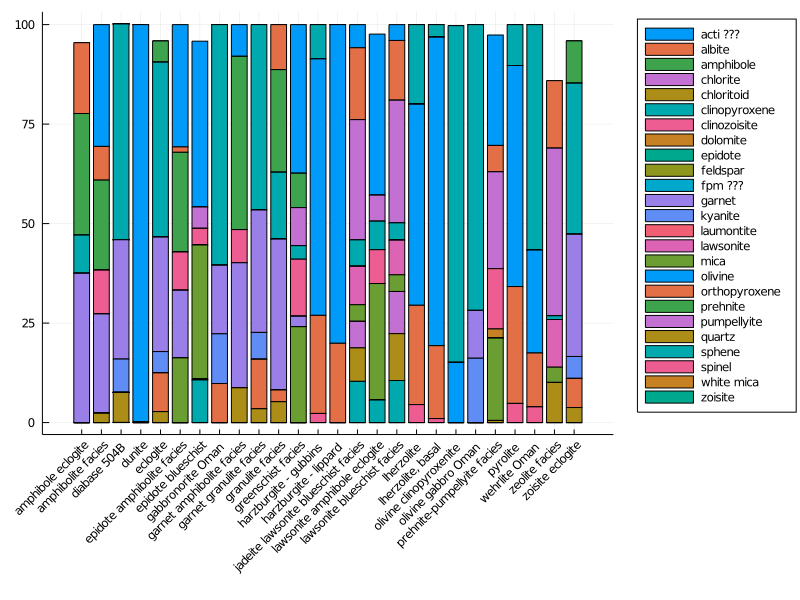

In [74]:
to_plot = p_plot_old[:, elts_idx]
to_plot[1,to_plot[1,:].==0] .= 1/100

ctg = repeat(unique_modes[elts_idx], inner = size(to_plot)[1])
#print(unique_modes[elts_idx])
rocks = [split(n, "(")[1] for n in header[5:end]]
nam = repeat(rocks, outer = size(to_plot)[2])

groupedbar(nam, to_plot, bar_position=:stack, group=ctg, legend = :outerright, 
    size = (800, 600), xrotation = 45, sort=rocks)

#savefig("../../present/1_15/old_sm_perplex_modes.pdf")

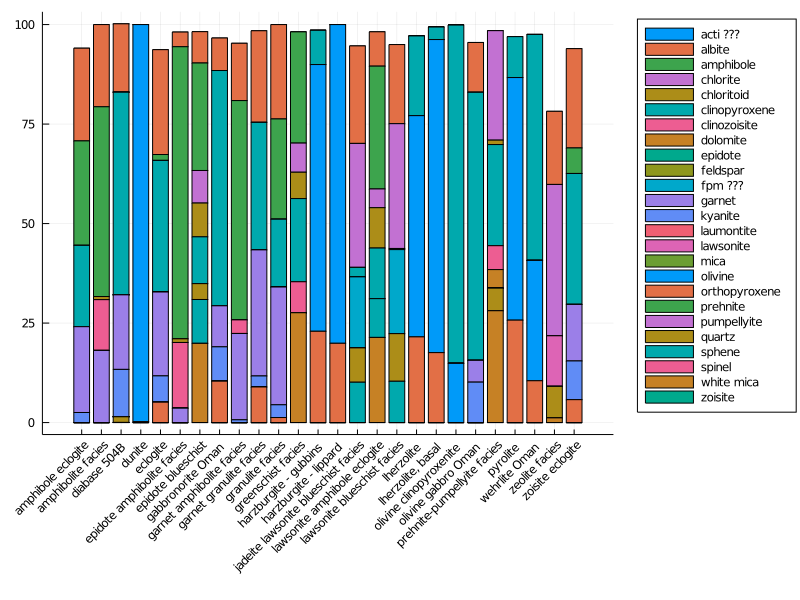

In [72]:
to_plot = p_plot_new[:, elts_idx]
to_plot[1,to_plot[1,:].==0] .= 1/100

ctg = repeat(unique_modes[elts_idx], inner = size(to_plot)[1])
#print(unique_modes[elts_idx])
rocks = [split(n, "(")[1] for n in header[5:end]]
nam = repeat(rocks, outer = size(to_plot)[2])

groupedbar(nam, to_plot, bar_position=:stack, group=ctg, legend = :outerright, 
    size = (800, 600), xrotation = 45, sort=rocks)

#savefig("../../present/1_15/new_sm_perplex_modes.pdf")

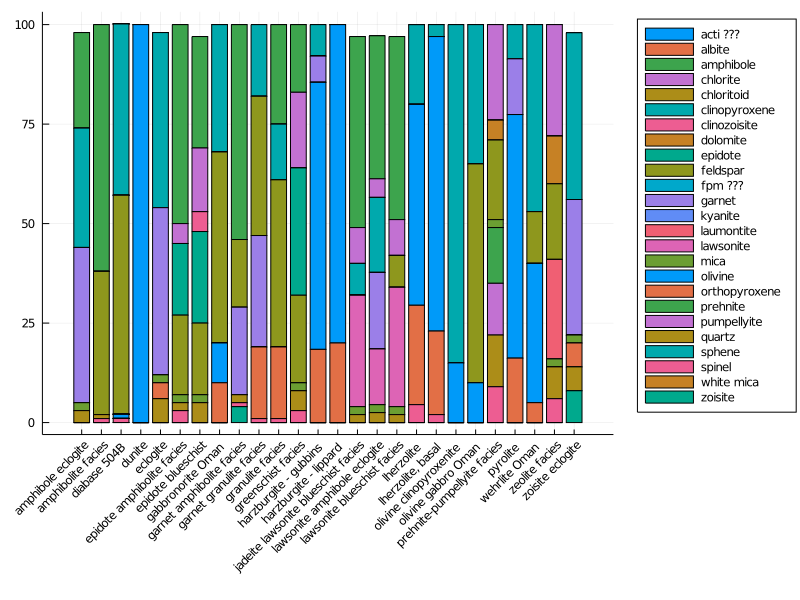

In [75]:
to_plot = ah_min_modes_plot[:, elts_idx]
to_plot[1,to_plot[1,:].==0] .= 1/100 # force inclusion 

ctg = repeat(unique_modes[elts_idx], inner = size(to_plot)[1])
#print(unique_modes[elts_idx])
rocks = [split(n, "(")[1] for n in header[5:end]]
nam = repeat(rocks, outer = size(to_plot)[2])

groupedbar(nam, to_plot, bar_position=:stack, group=ctg, legend = :outerright, 
    size = (800, 600), xrotation = 45, sort=rocks)
    
#savefig("../../present/1_15/ah_modes.pdf")

In [34]:
perplex_modes_new[(1,)]

22-element Array{AbstractString,1}:
 "Mica(CF)" 
 "acti"     
 "cz"       
 "pump"     
 "Gt(HP)"   
 "Chl(HP)"  
 "ab"       
 "q"        
 "Opx(HP)"  
 "O(HP)"    
 "cc"       
 "sph"      
 "law"      
 "Omph(GHP)"
 "ky"       
 "GlTrTsPg" 
 "feldspar" 
 "zo"       
 "ep"       
 "pre"      
 "lmt"      
 "Sp(HP)"   

In [36]:
println(unique_modes)

SubString{String}["Mica(W)", "ru", "O(JH)", "Sp(JH)", "zo", "fpm", "bq", "cz", "cor", "gl_dqf", "feldspar_B", "Augite(G)", "oAmph(DP)", "Chl(W)", "ab", "q", "fper", "stlb", "fanth", "cAmph(G)", "Ctd(W)", "Do(HP)", "cen", "Opx(JH)", "mic", "fstp", "St(W)", "cc", "mont", "Bio(TCC)", "ilm", "sph", "law", "Grt(JH)", "ky", "F"]


In [37]:
intersect(ah_mins_unique, unique_modes)

5-element Array{String,1}:
 "q"  
 "zo" 
 "cz" 
 "law"
 "cc" 

In [38]:
setdiff(unique_modes, ah_mins_unique)

31-element Array{SubString{String},1}:
 "Mica(W)"   
 "ru"        
 "O(JH)"     
 "Sp(JH)"    
 "fpm"       
 "bq"        
 "cor"       
 "gl_dqf"    
 "feldspar_B"
 "Augite(G)" 
 "oAmph(DP)" 
 "Chl(W)"    
 "ab"        
 ⋮           
 "cen"       
 "Opx(JH)"   
 "mic"       
 "fstp"      
 "St(W)"     
 "mont"      
 "Bio(TCC)"  
 "ilm"       
 "sph"       
 "Grt(JH)"   
 "ky"        
 "F"         

In [39]:
setdiff(ah_mins_unique, unique_modes)

14-element Array{String,1}:
 "feldspar" 
 "Gt(HP)"   
 "O(HP)"    
 "Opx(HP)"  
 "Omph(GHP)"
 "GlTrTsPg" 
 "Mica(CF)" 
 "Chl(HP)"  
 "ep"       
 "pre"      
 "pump"     
 "lmt"      
 "Sp(HP)"   
 "rut"      

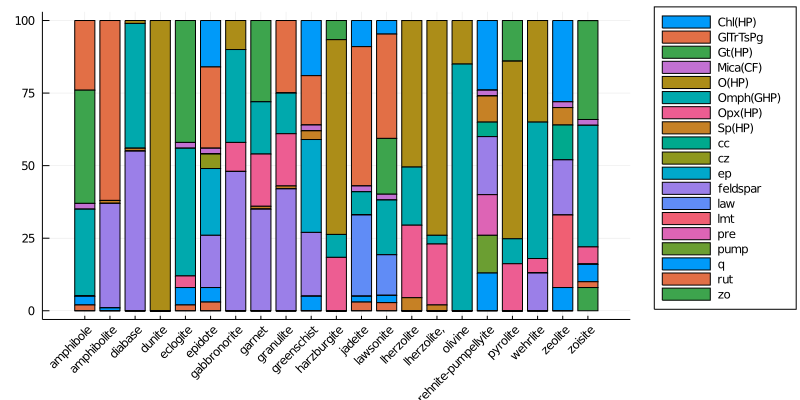

In [40]:
ctg = repeat(ah_mins_unique, inner = size(ah_min_modes_plot)[1])
rocks = [split(n)[1] for n in header[5:end]]
nam = repeat(rocks, outer = size(ah_min_modes_plot)[2])

groupedbar(nam, ah_min_modes_plot, bar_position=:stack, group=ctg, 
    legend = :outerright, size = (800, 400), xrotation = 45)

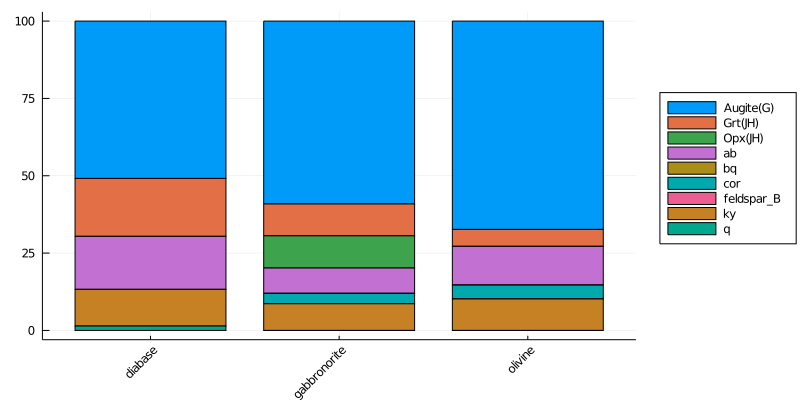

In [42]:
middle_depth = repeat([false,true,false], outer=26) # select middle depth for all 26 rocks
middle_perplex_plot = perplex_to_plot[middle_depth, :]

small_perplex_plot = middle_perplex_plot[1:3,:]
non_zero = (sum(small_perplex_plot, dims=1) .!= 0)[:]
small_perplex_plot = small_perplex_plot[:,non_zero]

ctg = repeat(unique_modes[non_zero], inner = size(small_perplex_plot)[1])
rocks = [split(n)[1] for n in header[5:end]][1:3]
nam = repeat(rocks, outer = size(small_perplex_plot)[2])

groupedbar(nam, small_perplex_plot, bar_position=:stack, group=ctg, legend = :outerright, 
    size = (800, 400), xrotation = 45, sort=rocks)

#savefig("/Users/gailin/dartmouth/crustal_structure/present/1_15/new_sm_perplex.pdf")

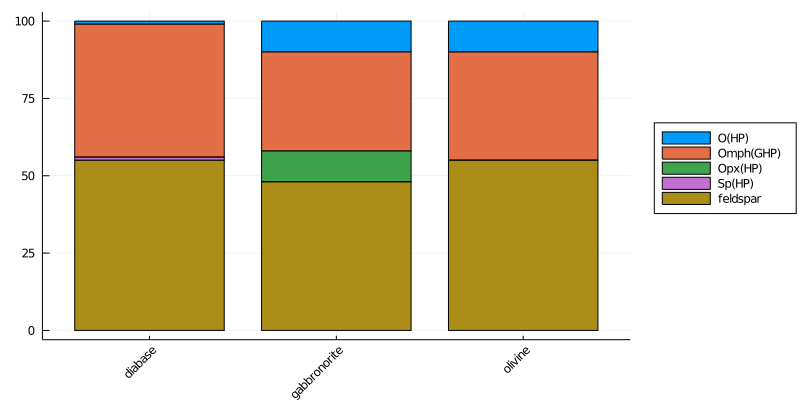

In [26]:
small_ah_plot = ah_min_modes_plot[1:3,:]
non_zero = (sum(small_ah_plot, dims=1) .!= 0)[:]
small_ah_plot = small_ah_plot[:,non_zero]

ctg = repeat(ah_mins_unique[non_zero], inner = size(small_ah_plot)[1])
rocks = [split(n)[1] for n in header[5:end]][1:3]
nam = repeat(rocks, outer = size(small_ah_plot)[2])

groupedbar(nam, small_ah_plot, bar_position=:stack, group=ctg, 
    legend = :outerright, size = (800, 400), xrotation = 45)

In [27]:
omph_index = findfirst(isequal("Omph(GHP)"), unique_modes)
not_100 = nansum(middle_perplex_plot, dims=2) .< 99
has_omph = middle_perplex_plot[:,omph_index] .> 1
println("not 100 and have omph = $(sum(not_100 .& has_omph))")
println("not 100 and no omph = $(sum(not_100 .& (.~has_omph)))")
println("total not 100 = $(sum(not_100))")

MethodError: MethodError: no method matching keys(::Set{Any})
Closest candidates are:
  keys(!Matched::Core.SimpleVector) at essentials.jl:606
  keys(!Matched::Cmd) at process.jl:963
  keys(!Matched::Tuple) at tuple.jl:46
  ...

In [28]:
mystery = (not_100 .& (.~has_omph))[:]
println(unique_modes)
middle_perplex_plot[mystery,11:end]

UndefVarError: UndefVarError: has_omph not defined

In [132]:
using Printf
a = 1e-10
x=@sprintf("%.3E", a)

"1.000E-10"